In [6]:

pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/109.5 kB 435.7 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/109.5 kB 465.5 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/109.5 kB 653.6 kB/s eta 0:00:01
   -------------------------------------- 109.5/109.5 kB 527.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf




In [8]:
start = '2012-01-01'
end = '2024-01-01'

stock='GOOG'
data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [9]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


In [10]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400
2023-12-28,141.850006,142.270004,140.828003,141.279999,141.279999,12192500
2023-12-29,140.679993,141.434998,139.899994,140.929993,140.929993,14872700


In [11]:
data.reset_index(inplace=True)

In [12]:
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
3013,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
3014,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
3015,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400
3016,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.279999,12192500


In [13]:
ma_100_days=data.Close.rolling(100).mean()

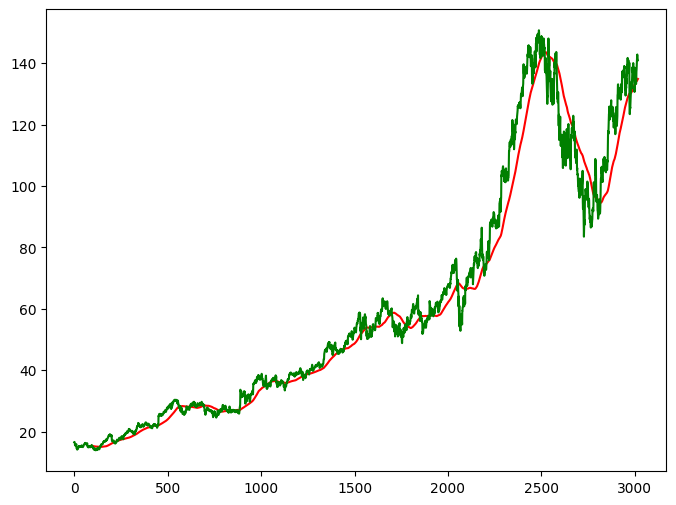

In [14]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [15]:
ma_200_days=data.Close.rolling(200).mean()

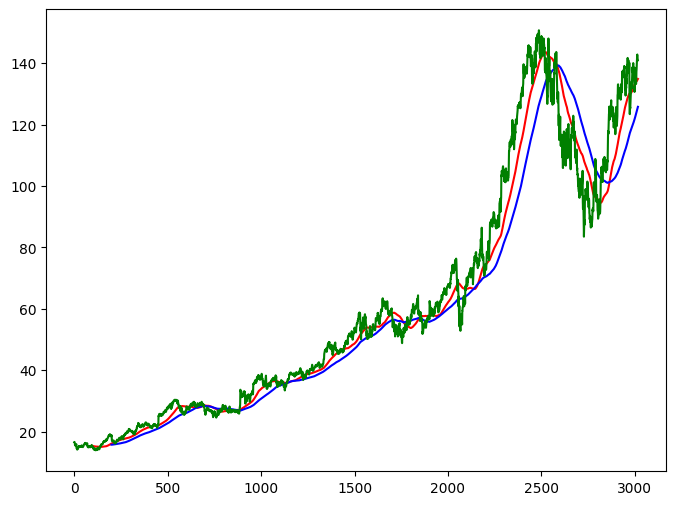

In [16]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [17]:
data.dropna(inplace=True)

In [18]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [19]:
data_train.shape[0],data_train.shape[0]

(2414, 2414)

In [20]:
data_test.shape[0]

604

In [28]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 401.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 1.9 MB/s eta 0:00:06
   ---------------------------------------- 0.1/10.6 MB 653.6 kB/s eta 0:00:17
    --------------------------------------- 0.2/10.6 MB 1.5 MB/s eta 0:00:08
    --------------------------------------- 0.2/10.6 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.3/10.6 MB 1.4 MB/s eta 0:00:08
   - -----------------

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [30]:
data_train_scale= scaler.fit_transform(data_train)

In [31]:
x=[]
y=[]


for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    


In [32]:
x,y =np.array(x), np.array(y)

In [33]:

import tensorflow as tf

In [39]:

from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [40]:
ragged_tensor_value = tf.compat.v1.ragged.RaggedTensorValue
graph = tf.compat.v1.get_default_graph()

model= Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
              input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units =60 , activation ='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))



In [42]:
optimizer = tf.compat.v1.train.AdamOptimizer()

model.compile(optimizer='adam', loss= 'mean_squared_error')

In [43]:
model.fit(x,y, epochs =50 , batch_size=32, verbose =1)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - loss: 0.0380
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0041
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 0.0034
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.0030
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 0.0033
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 0.0028
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.0023
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.0022
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.0025
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - loss: 0.0028
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - loss: 0.0020
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - loss: 0.0022
Epoch 13/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - loss: 0.0021
Epoch 14/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 0.0021
Epoch 15/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - 

In [ ]:
model.save("Stock Model Predtion real .keras")

In [34]:
 model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_16 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_17 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_17 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_18 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_18 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_19 (LSTM)              (None, 120)              

In [35]:
 pas_100_days= data_train.tail(100)

In [36]:
data_test=pd.concat([pas_100_days, data_test], ignore_index=True)

In [37]:
data_test


,Close
0,104.625999
1,104.554001
2,101.810997
3,102.160004
4,101.929497
...,...
699,142.720001
700,142.820007
701,141.440002
702,141.279999


In [38]:
data_test_scale=scaler.fit_transform(data_test)

In [39]:
x=[]
y=[]


for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x,y =np.array(x), np.array(y)

In [40]:
y_predict = model.predict(x)

19/19 [==============================] - 2s 68ms/step


In [41]:
y_predict

array([[0.75172555],
       [0.75404906],
       [0.7565702 ],
       [0.75953174],
       [0.76277226],
       [0.76625127],
       [0.76985705],
       [0.7735758 ],
       [0.77680814],
       [0.7789401 ],
       [0.779898  ],
       [0.780364  ],
       [0.78157675],
       [0.78449297],
       [0.78941405],
       [0.79578674],
       [0.80342376],
       [0.8121277 ],
       [0.82142043],
       [0.8308001 ],
       [0.8392558 ],
       [0.84630316],
       [0.8520471 ],
       [0.8565165 ],
       [0.85983765],
       [0.8613615 ],
       [0.8613706 ],
       [0.8604339 ],
       [0.8596154 ],
       [0.85935926],
       [0.85891235],
       [0.8570866 ],
       [0.8536841 ],
       [0.84948903],
       [0.84558034],
       [0.84286946],
       [0.841402  ],
       [0.83938795],
       [0.83528453],
       [0.828417  ],
       [0.820028  ],
       [0.8107721 ],
       [0.80193526],
       [0.7947752 ],
       [0.7903272 ],
       [0.78903186],
       [0.7902825 ],
       [0.792

In [42]:
scale=1/scaler.scale_

In [43]:
y_predict= y_predict*scale

In [44]:
 y=y*scale

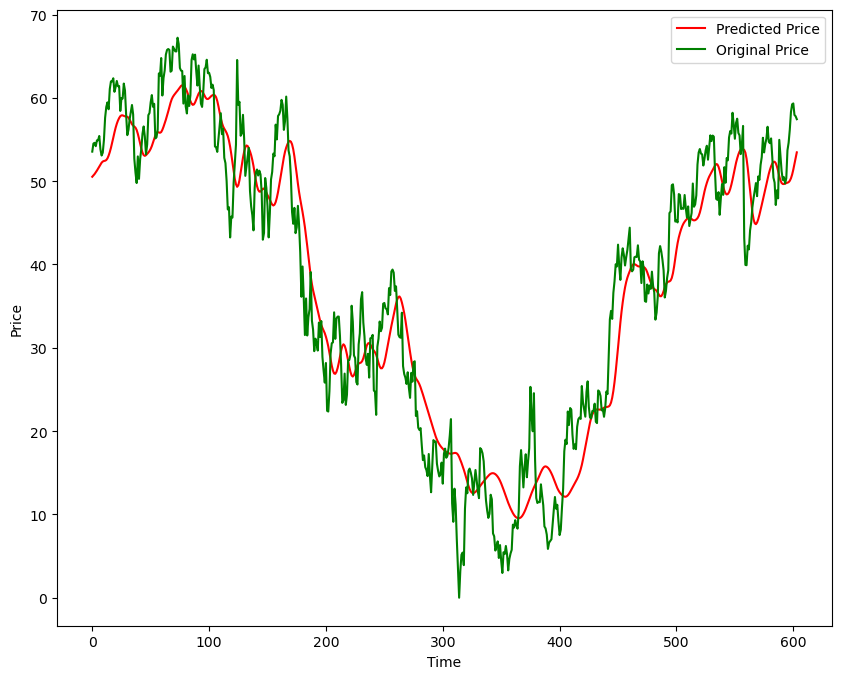

In [45]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y,'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
           

In [46]:
model.save('Stock Model No Warning.keras')